<a href="https://colab.research.google.com/github/Akbar453/Predictive-Maintenance/blob/main/Predictive_Maintenance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install kaggle

In [ ]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/


In [ ]:
!kaggle datasets download -d shivamb/machine-predictive-maintenance-classification


Dataset URL: https://www.kaggle.com/datasets/shivamb/machine-predictive-maintenance-classification
License(s): CC0-1.0
  0% 0.00/137k [00:00<?, ?B/s]
100% 137k/137k [00:00<00:00, 64.5MB/s]


In [ ]:
!unzip machine-predictive-maintenance-classification.zip


Archive:  machine-predictive-maintenance-classification.zip
  inflating: predictive_maintenance.csv  


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
# Set the color palette for seaborn
sns.set_palette("tab10")

# Set the style for seaborn plots
sns.set_style("whitegrid")

In [ ]:
data = pd.read_csv("/content/predictive_maintenance.csv")

In [ ]:
data.sample(10)

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
2011,2012,L49191,L,298.7,308.5,1616,30.2,34,0,No Failure
1401,1402,H30815,H,298.9,310.2,1532,37.7,166,0,No Failure
2157,2158,M17017,M,299.4,309.0,1939,19.8,204,0,No Failure
8695,8696,M23555,M,297.2,308.6,1498,44.4,9,0,No Failure
458,459,L47638,L,297.3,308.6,1486,42.6,105,0,No Failure
456,457,H29870,H,297.3,308.7,1478,47.6,98,0,No Failure
8502,8503,H37916,H,298.6,309.8,1279,55.9,152,0,No Failure
3640,3641,H33054,H,302.4,311.6,1544,39.1,70,0,No Failure
9132,9133,M23992,M,297.6,308.6,1585,42.0,90,0,No Failure
2391,2392,L49571,L,299.2,308.4,1580,32.6,142,0,No Failure


In [ ]:
#check null values
pd.DataFrame(data.isnull().sum
            ())

,0
UDI,0
Product ID,0
Type,0
Air temperature [K],0
Process temperature [K],0
Rotational speed [rpm],0
Torque [Nm],0
Tool wear [min],0
Target,0
Failure Type,0


In [ ]:
#Check Duplicate
data.duplicated().sum()

0

In [ ]:
#drop Unimportant colums
data.drop(["UDI" ,
           "Product ID"] , axis =1  , inplace =True)

In [ ]:
data.sample()

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
6216,L,301.1,310.8,1724,27.5,101,0,No Failure


## Exploratory  Data Analysis

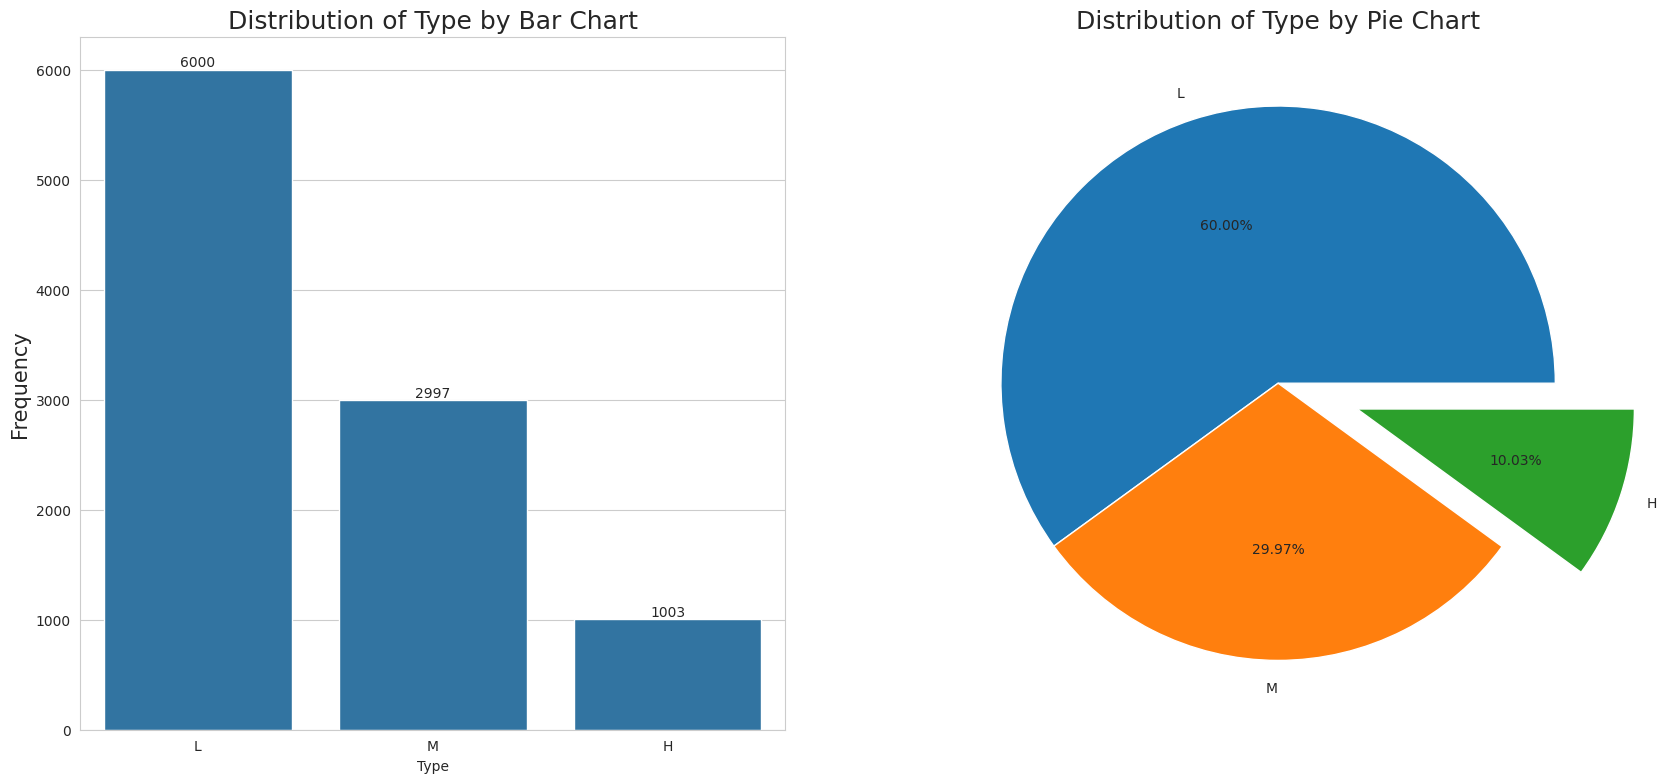

In [ ]:
fig, ax = plt.subplots(ncols=2, nrows=1, figsize=(20, 9))

# ax[0]
ax[0].set_title("Distribution of Type by Bar Chart", fontdict={"size": 18})
figure = sns.countplot(x=data.Type, ax=ax[0], order=["L", "M", "H"])
for container in figure.containers:
    figure.bar_label(container)
ax[0].set_ylabel("Frequency", fontdict={"size": 15})

# ax[1]
ax[1].set_title("Distribution of Type by Pie Chart", fontdict={"size": 18})
ax[1].pie(x=data.Type.value_counts().values, labels=data.Type.value_counts().index, autopct='%1.2f%%', explode=[0, 0, 0.3])

plt.show()

In [ ]:
#Numerical Colums
data.select_dtypes(["float","int"])

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target
0,298.1,308.6,1551,42.8,0,0
1,298.2,308.7,1408,46.3,3,0
2,298.1,308.5,1498,49.4,5,0
3,298.2,308.6,1433,39.5,7,0
4,298.2,308.7,1408,40.0,9,0
...,...,...,...,...,...,...
9995,298.8,308.4,1604,29.5,14,0
9996,298.9,308.4,1632,31.8,17,0
9997,299.0,308.6,1645,33.4,22,0
9998,299.0,308.7,1408,48.5,25,0


In [ ]:
#summary Statistic
data.describe()

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,300.004930,310.005560,1538.776100,39.986910,107.951000,0.033900
std,2.000259,1.483734,179.284096,9.968934,63.654147,0.180981
min,295.300000,305.700000,1168.000000,3.800000,0.000000,0.000000
25%,298.300000,308.800000,1423.000000,33.200000,53.000000,0.000000
50%,300.100000,310.100000,1503.000000,40.100000,108.000000,0.000000
75%,301.500000,311.100000,1612.000000,46.800000,162.000000,0.000000
max,304.500000,313.800000,2886.000000,76.600000,253.000000,1.000000


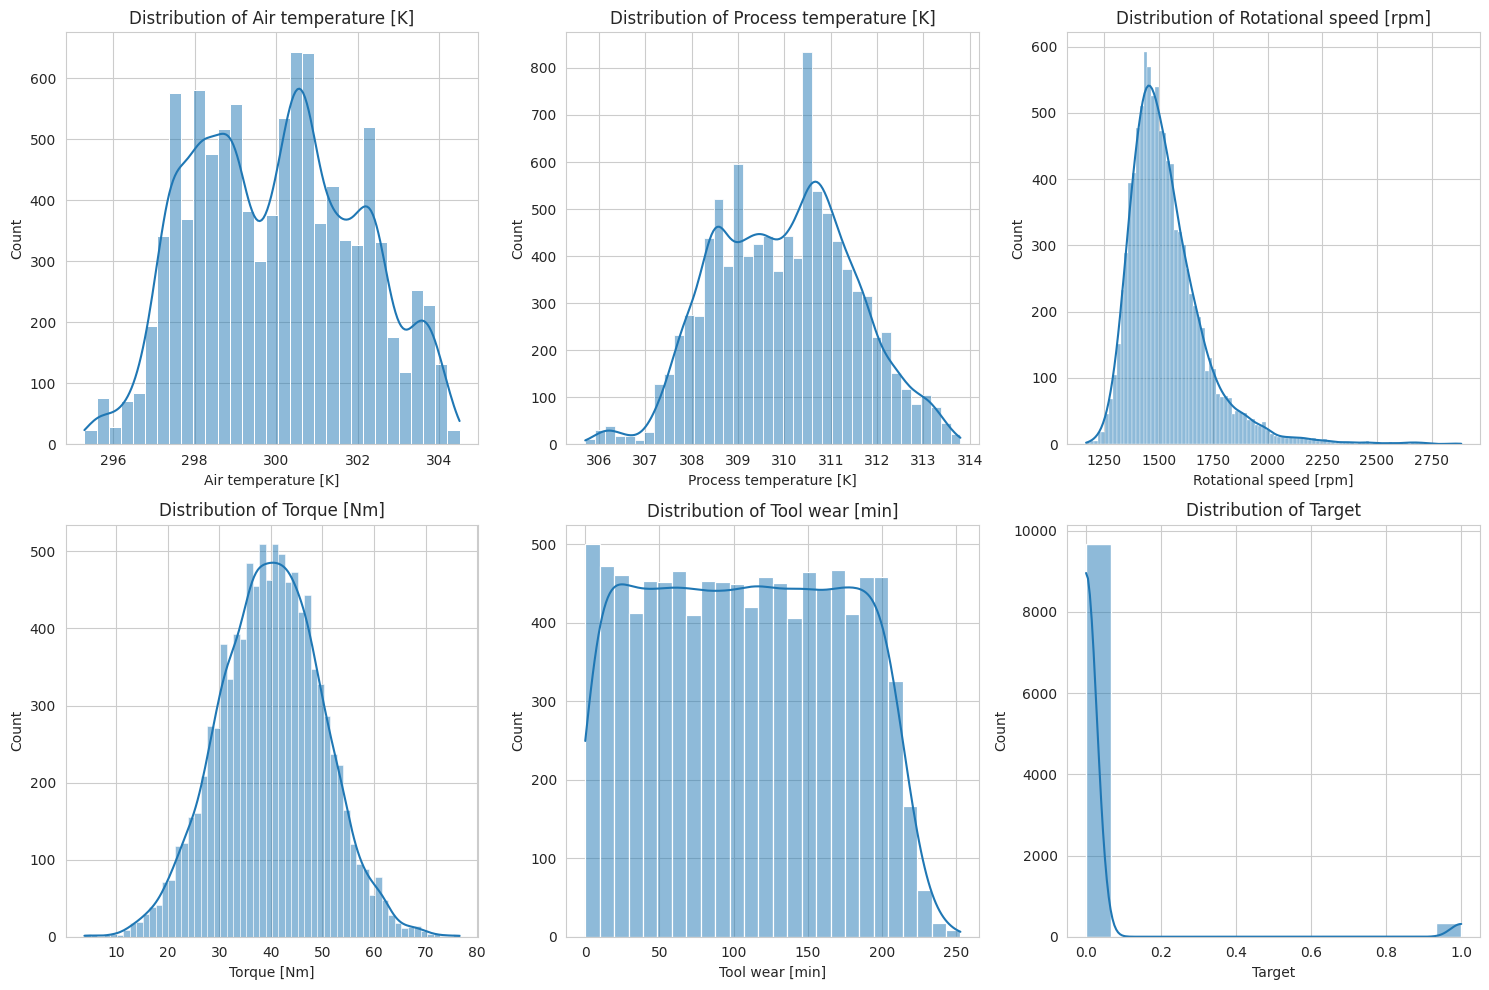

In [ ]:
plt.figure(figsize=(15, 10))
numerical_columns = data.select_dtypes(include=["float", "int"]).columns

for i, col in enumerate(numerical_columns, 1):
    plt.subplot(2, 3, i)
    sns.histplot(data[col], kde=True )
    plt.title(f'Distribution of {col}')

plt.tight_layout()
plt.show()

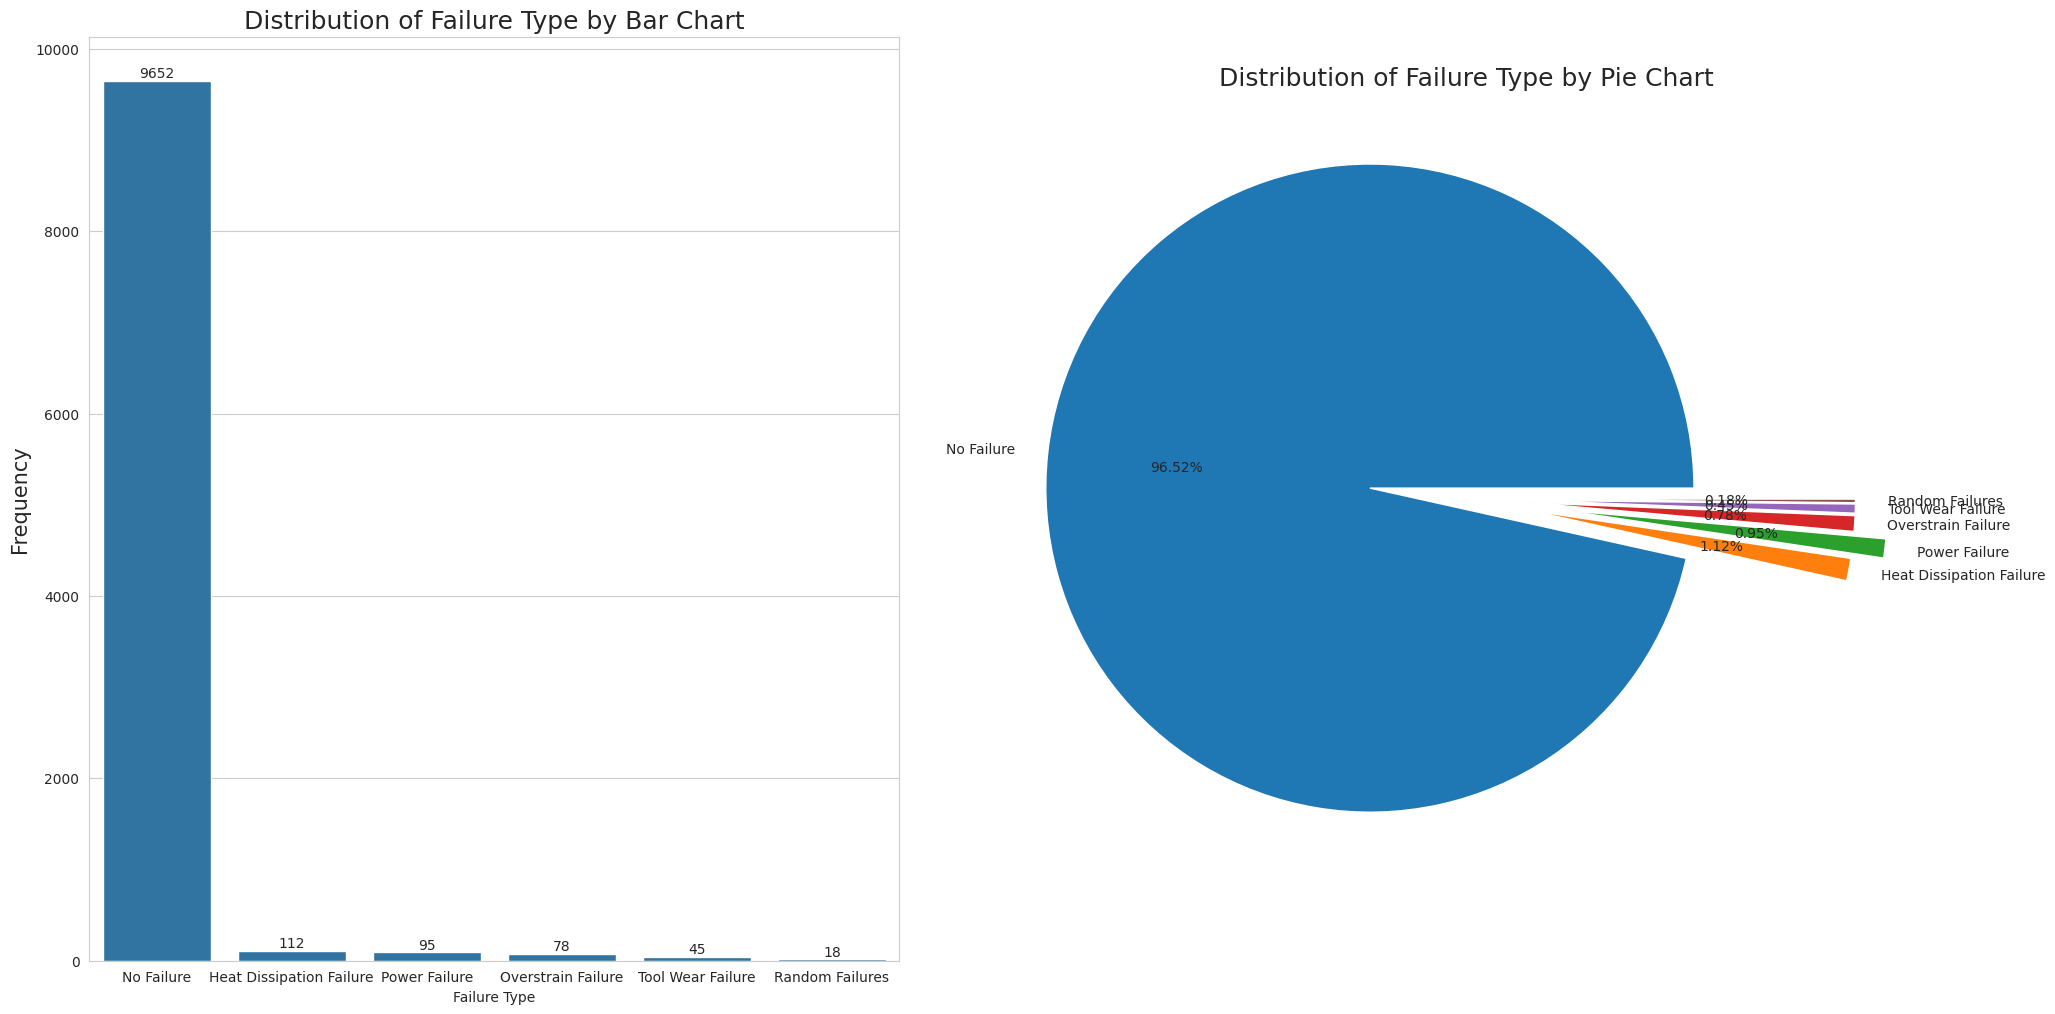

In [ ]:
fig, ax = plt.subplots(ncols=2, nrows=1, figsize=(23, 12))

# ax[0]
ax[0].set_title("Distribution of Failure Type by Bar Chart", fontdict={"size": 18})
figure = sns.countplot(x=data["Failure Type"], ax=ax[0] ,order=data["Failure Type"].value_counts().index)
for container in figure.containers:
    figure.bar_label(container)
ax[0].set_ylabel("Frequency", fontdict={"size": 15})

# ax[1]
ax[1].set_title("Distribution of Failure Type by Pie Chart", fontdict={"size": 18})
ax[1].pie(x=data["Failure Type"].value_counts().values,
          labels=data["Failure Type"].value_counts().index,
          autopct='%1.2f%%', explode=[.3, 0.2, 0.3 ,.2 ,.2,0.2])

plt.show()

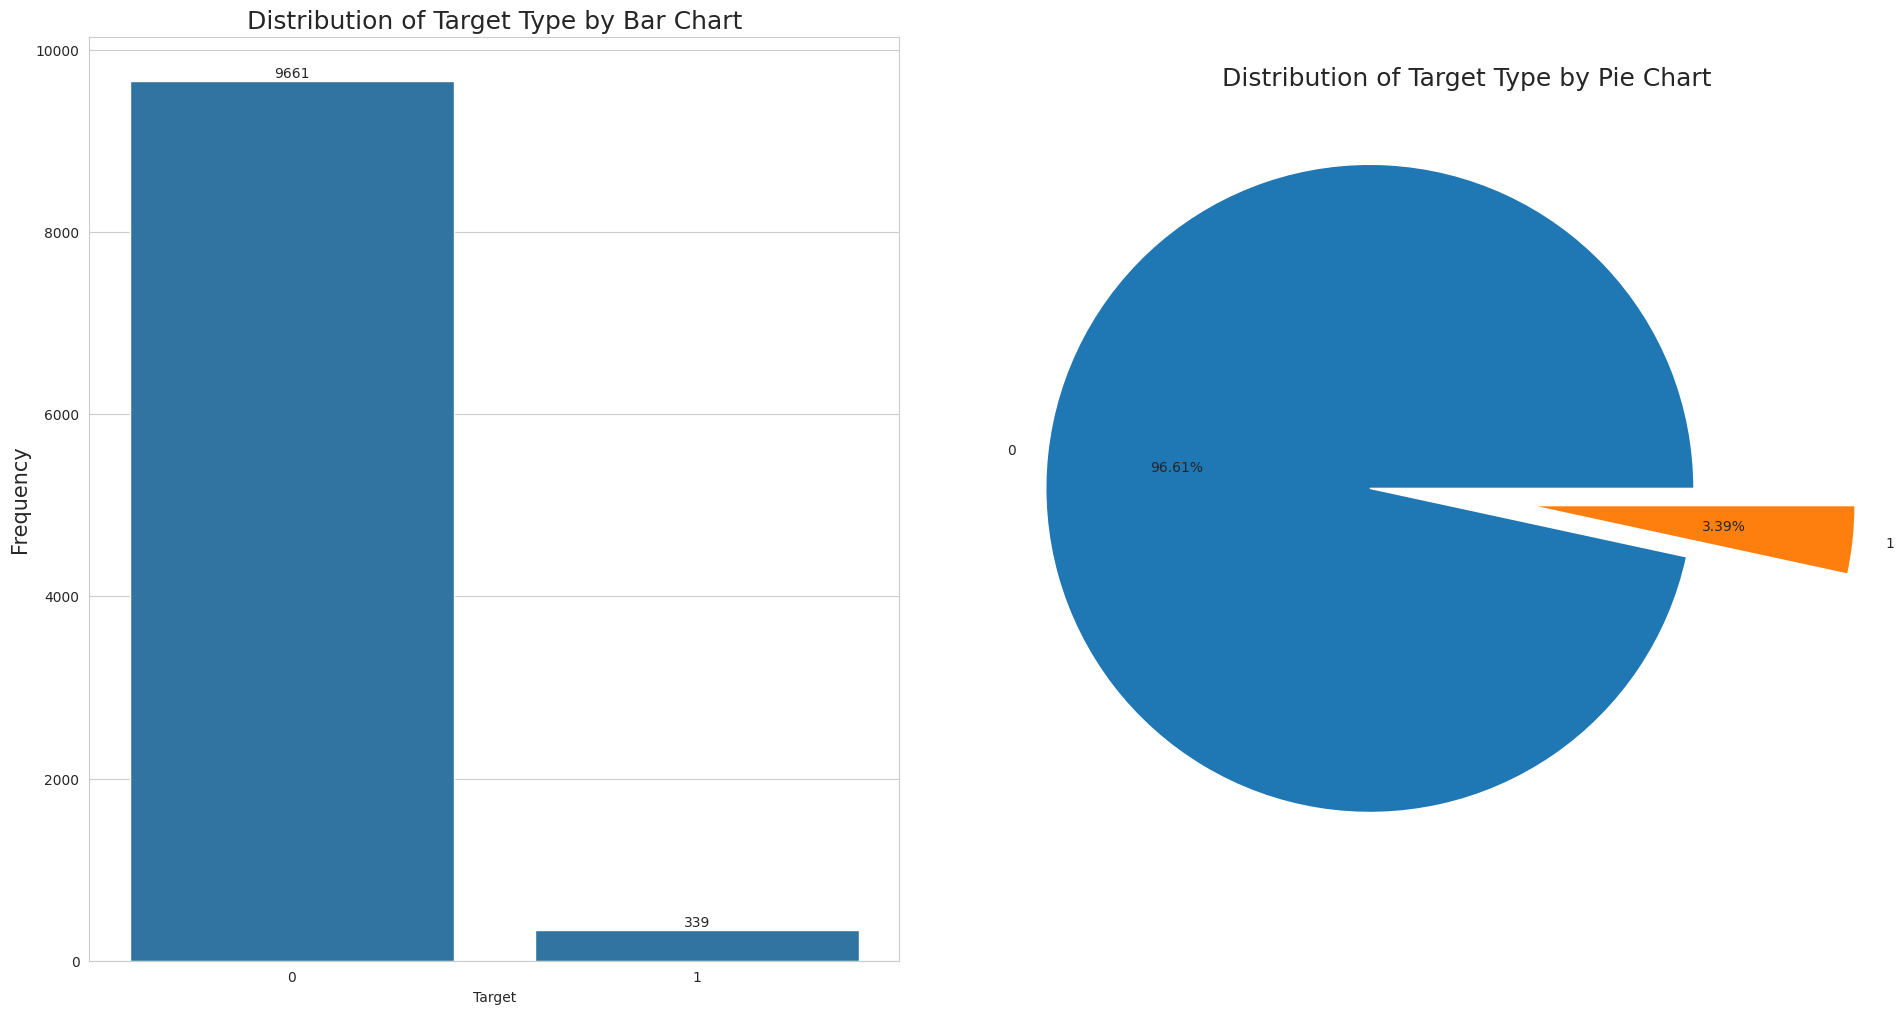

In [ ]:
fig, ax = plt.subplots(ncols=2, nrows=1, figsize=(23, 12))

# ax[0]
ax[0].set_title("Distribution of Target Type by Bar Chart", fontdict={"size": 18})
figure = sns.countplot(x=data["Target"], ax=ax[0] ,order=data["Target"].value_counts().index)
for container in figure.containers:
    figure.bar_label(container)
ax[0].set_ylabel("Frequency", fontdict={"size": 15})

# ax[1]
ax[1].set_title("Distribution of Target Type by Pie Chart", fontdict={"size": 18})
ax[1].pie(x=data["Target"].value_counts().values,
          labels=data["Target"].value_counts().index,
          autopct='%1.2f%%', explode=[.3, 0.2])

plt.show()

<Figure size 3000x2500 with 0 Axes>

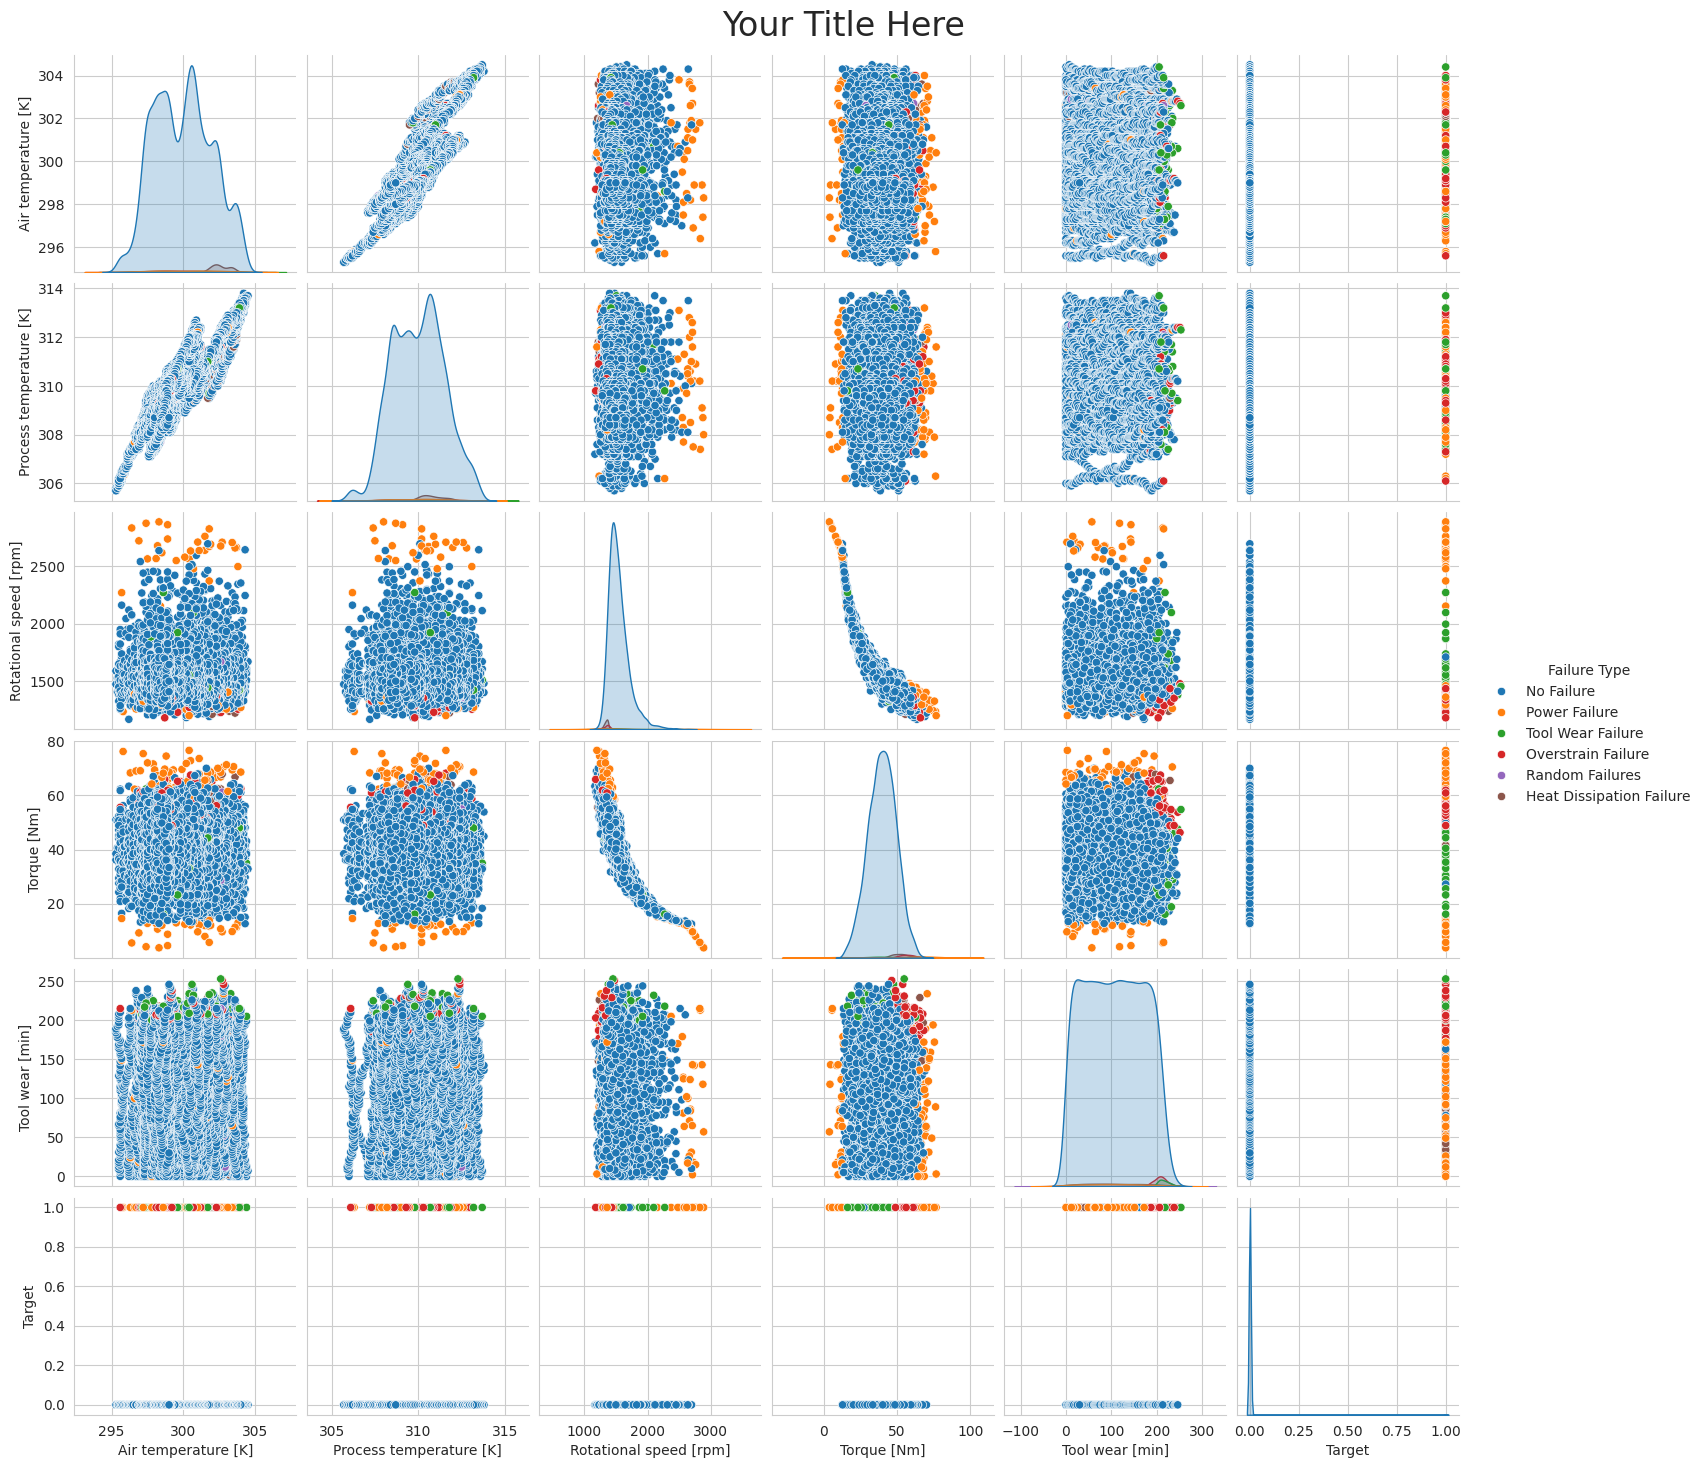

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'data' is your DataFrame and 'Failure Type' is the column for hue
plt.figure(figsize=(30, 25))
pairplot = sns.pairplot(data=data, hue="Failure Type")
pairplot.fig.suptitle('Your Title Here', fontsize=24)  # Add a title
pairplot.fig.subplots_adjust(top=0.95)  # Adjust the top to make room for the title
plt.show()

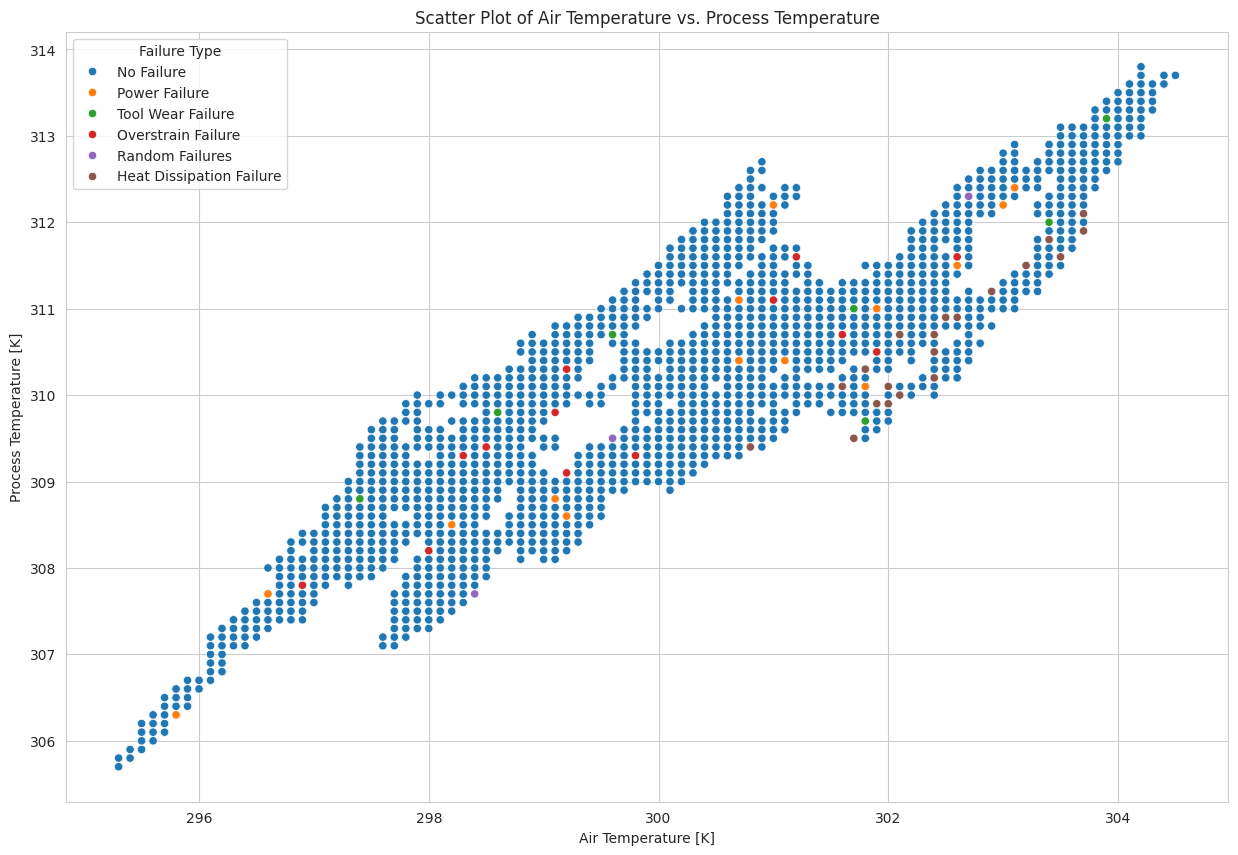

In [ ]:
plt.figure(figsize=(15, 10))
sns.scatterplot(x=data["Air temperature [K]"], y=data["Process temperature [K]"], hue=data["Failure Type"])
plt.title("Scatter Plot of Air Temperature vs. Process Temperature")
plt.xlabel("Air Temperature [K]")
plt.ylabel("Process Temperature [K]")
plt.legend(title="Failure Type")
plt.show()

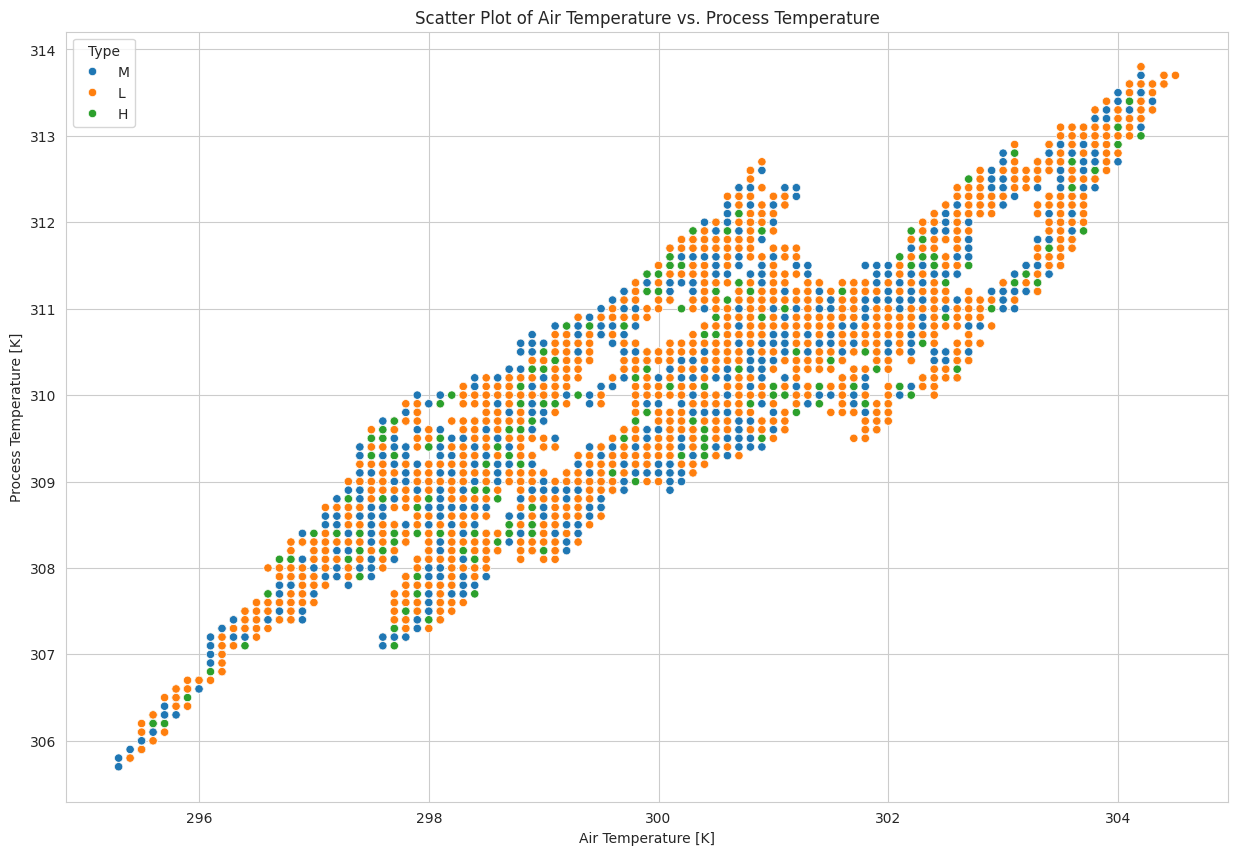

In [ ]:
# Scatter plot showing the relationship between Air temperature and Process temperature
plt.figure(figsize=(15, 10))
sns.scatterplot(x=data["Air temperature [K]"], y=data["Process temperature [K]"], hue=data["Type"])
plt.title("Scatter Plot of Air Temperature vs. Process Temperature")
plt.xlabel("Air Temperature [K]")
plt.ylabel("Process Temperature [K]")
plt.legend(title="Type")
plt.show()

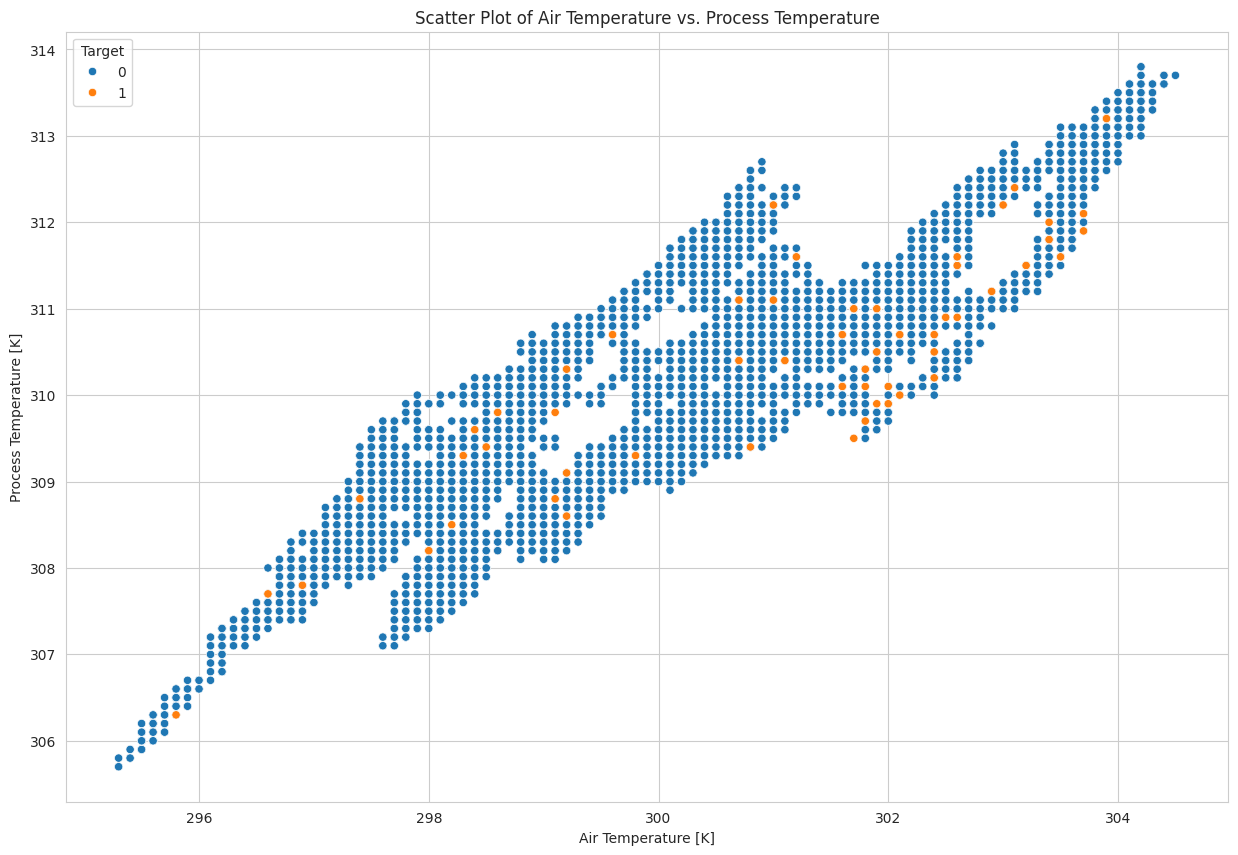

In [ ]:
# Scatter plot showing the relationship between Air temperature and Process temperature
plt.figure(figsize=(15, 10))
sns.scatterplot(x=data["Air temperature [K]"], y=data["Process temperature [K]"], hue=data["Target"])
plt.title("Scatter Plot of Air Temperature vs. Process Temperature")
plt.xlabel("Air Temperature [K]")
plt.ylabel("Process Temperature [K]")
plt.legend(title="Target")
plt.show()

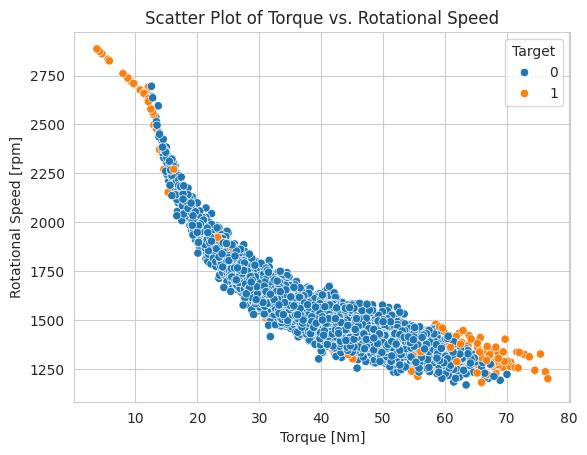

In [ ]:
# Scatter plot showing the relationship between Torque and Rotational speed with hue based on the Target variable
sns.scatterplot(data=data, x="Torque [Nm]",
                y="Rotational speed [rpm]",
                hue="Target")

# Adding title and axis labels
plt.title("Scatter Plot of Torque vs. Rotational Speed")
plt.xlabel("Torque [Nm]")
plt.ylabel("Rotational Speed [rpm]")

# Showing the plot
plt.show()

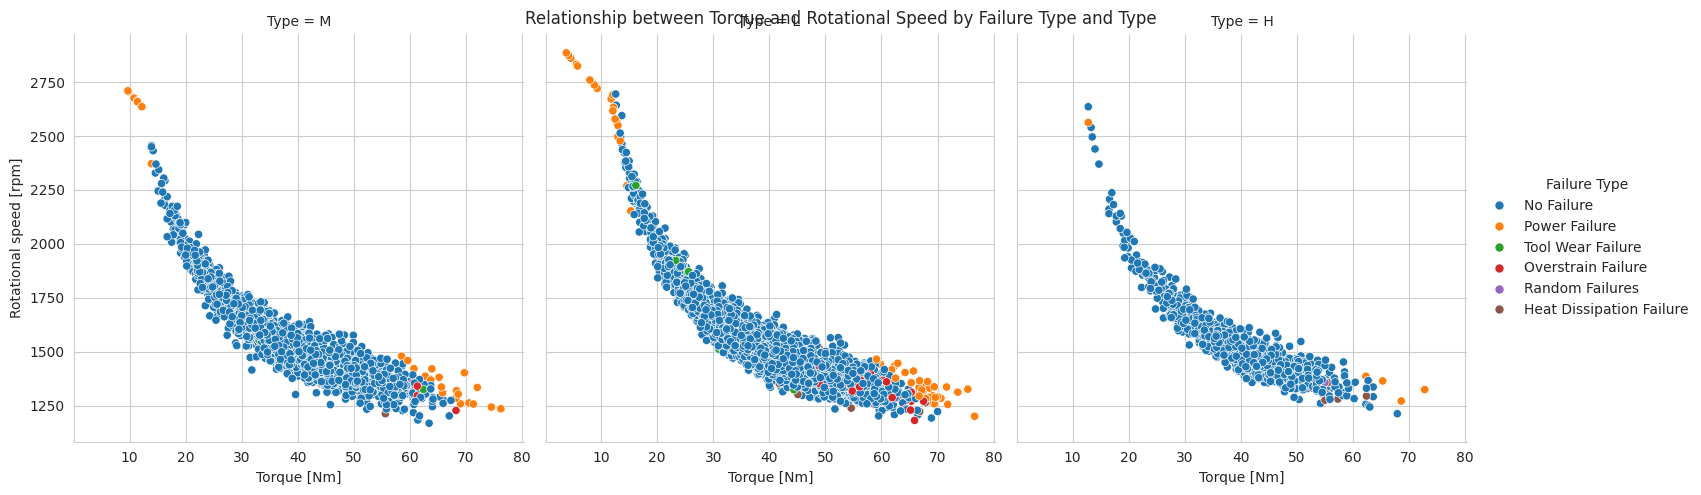

In [ ]:
# Scatter plot showing the relationship between Torque and Rotational speed with hue based on Failure Type and separated by Type
sns.relplot(data=data, x="Torque [Nm]",
            y="Rotational speed [rpm]",
            hue="Failure Type", col="Type")

# Adding title and axis labels
plt.suptitle("Relationship between Torque and Rotational Speed by Failure Type and Type")
plt.xlabel("Torque [Nm]")
plt.ylabel("Rotational Speed [rpm]")

# Showing the plot
plt.show()

**Data Preparing**

In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

# Fit the label encoder on the 'Type' column and transform the data
label_encoder.fit(data['Type'])
data['Type'] = label_encoder.transform(data['Type'])

# Fit the label encoder on the 'Target' column and transform the data
label_encoder.fit(data['Target'])
data['Target'] = label_encoder.transform(data['Target'])

In [ ]:
x= data.drop("Failure Type",axis=1)
y=data["Failure Type"].values

In [ ]:
x = pd.get_dummies(x, drop_first=True)

# Extract the column names after creating dummy variables
col_name = x.columns

In [ ]:
x =x.values

In [ ]:
from imblearn.over_sampling import SMOTE
from collections import Counter

In [ ]:
# Fit the label encoder on the target variable 'y'
label_encoder.fit(y)

# Transform the target variable 'y' using the fitted label encoder
y = label_encoder.transform(y)

In [ ]:
smk = SMOTE(random_state=42)

# Apply SMOTE to the feature set 'x' and target variable 'y' to resample them
X_res, y_res = smk.fit_resample(x, y)

# Convert the resampled target variable 'y_res' to a Pandas Series
y__ = pd.Series(y_res)

# Count the occurrences of each class in the resampled target variable
y__.value_counts()

,count
1,9652
3,9652
5,9652
2,9652
4,9652
0,9652


In [ ]:
X_res.shape,y_res.shape

((57912, 7), (57912,))

In [ ]:
print(f"Orignal Dataset Shape {Counter(y)}")
print(f"Resampled Dataset Shape {Counter(y_res)}")

Orignal Dataset Shape Counter({1: 9652, 0: 112, 3: 95, 2: 78, 5: 45, 4: 18})
Resampled Dataset Shape Counter({1: 9652, 3: 9652, 5: 9652, 2: 9652, 4: 9652, 0: 9652})


In [ ]:
# Combine the resampled feature set 'X_res' and the resampled target variable 'y_res' into a single DataFrame
df_new = pd.concat([pd.DataFrame(X_res), pd.DataFrame(y_res)], axis=1)

In [ ]:
col_new=col_name
col_new=col_new.to_list()
col_new.append("Failure Type")
df_new.columns=col_new
df_new.head()

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,2.0,298.1,308.6,1551.0,42.8,0.0,0.0,1
1,1.0,298.2,308.7,1408.0,46.3,3.0,0.0,1
2,1.0,298.1,308.5,1498.0,49.4,5.0,0.0,1
3,1.0,298.2,308.6,1433.0,39.5,7.0,0.0,1
4,1.0,298.2,308.7,1408.0,40.0,9.0,0.0,1


In [ ]:
x= df_new.drop("Failure Type" ,axis =1)
y=df_new["Failure Type"]

In [ ]:
x = pd.get_dummies(x,drop_first=True)

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
# Fit the StandardScaler to the feature set 'x' and transform it
x = StandardScaler().fit_transform(x)

In [ ]:
from sklearn.model_selection import train_test_split
x_train , x_test ,y_train ,y_test = train_test_split(x,y ,test_size=.2 ,shuffle=True ,stratify=y)

## Modelling

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import (confusion_matrix ,ConfusionMatrixDisplay ,accuracy_score ,recall_score ,precision_score ,f1_score)

In [ ]:
def select_model(x,y) :
    x_train , x_test ,y_train ,y_test = train_test_split(x,y ,test_size=.2 ,shuffle=True ,stratify=y)
    models =[LogisticRegression(n_jobs=-1) , SVC(kernel= "rbf"),DecisionTreeClassifier() ,
             RandomForestClassifier(n_estimators=100 ,n_jobs=-1),XGBClassifier(n_estimators=100)]
    acc_train= []
    acc_test= []

    for model in models :
        #fitting
        model.fit(x_train,y_train)
        #prediction
        y_pred_train = model.predict(x_train)
        y_pred_test = model.predict(x_test)

        #accuracy
        train_acc= round(model.score(x_train, y_train) * 100, 2)
        test_acc =round(model.score(x_test, y_test) * 100, 2)

        acc_train.append(train_acc)
        acc_test.append(test_acc)

    dic = {"Model" : models ,
           "Train_acc" : acc_train ,
           "Test_acc" : acc_test}
    return pd.DataFrame(dic)

In [ ]:
training = select_model(x,y)
training

,Model,Train_acc,Test_acc
0,LogisticRegression(n_jobs=-1),89.60,89.21
1,SVC(),97.72,97.32
2,DecisionTreeClassifier(),100.00,99.56
3,"(DecisionTreeClassifier(max_features='sqrt', r...",100.00,99.84
4,"XGBClassifier(base_score=None, booster=None, c...",100.00,99.83


## Result

In [ ]:
bestmodel= training["Model"][4]

acc :  0.999654666321333


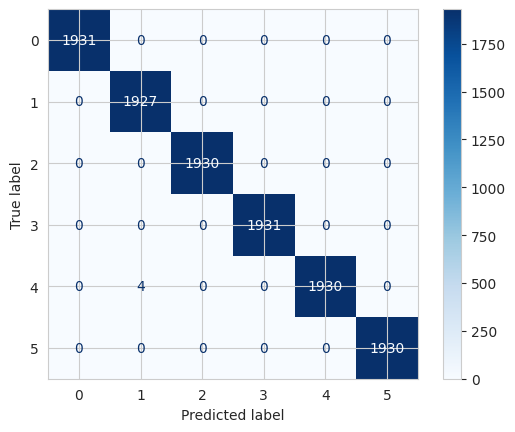

In [ ]:
y_pred_test= bestmodel.predict(x_test)
cm = confusion_matrix(y_pred_test,y_test )

disp = ConfusionMatrixDisplay(confusion_matrix=cm)


print("acc : " ,accuracy_score(y_pred_test,y_test))
disp.plot(cmap='Blues')

plt.show()

In [ ]:
pd.DataFrame({"Actual" :y_test , "Predict" :y_pred_test})

,Actual,Predict
39644,4,4
17070,0,0
55629,5,5
56961,5,5
10615,0,0
...,...,...
6730,1,1
42161,4,4
29988,3,3
11598,0,0


In [ ]:
import pickle

# Save the model to a file
filename = 'trained_model.sav'
pickle.dump(bestmodel, open(filename, 'wb'))